In [3]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import datasets
iris = datasets.load_iris()
# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
# Разделите данные на выборку для обучения и тестирования
# Постройте модель LDA
# Визуализируйте предсказания для тестовой выборки и центры классов
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [9]:
# 1) Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris_class = iris.target
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# data_iris.head()
data_iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
data_iris_sl_sw = data_iris[['sepal length (cm)','sepal width (cm)']]
data_iris_sl_sw.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [70]:
#Тестовая и тренировочная выборка
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_iris_sl_sw, data_iris_class, test_size=0.25)

In [71]:
lda_iris = LinearDiscriminantAnalysis()
lda_iris.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [72]:
lda_iris.predict(X_test)

array([1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2])

In [73]:
result = pd.DataFrame([y_test, lda_iris.predict(X_test)]).T
# result

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda_iris.predict(X_test))

0.8947368421052632

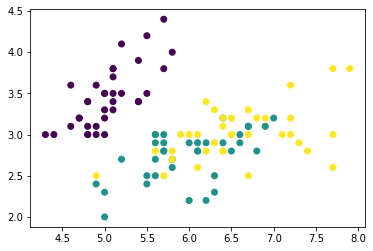

In [77]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [78]:
lda_iris.means_

array([[5.04      , 3.45428571],
       [5.98333333, 2.74444444],
       [6.55609756, 2.97560976]])

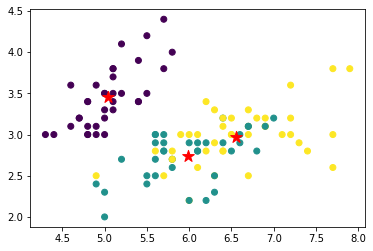

In [83]:
# центроиды
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda_iris.means_[:, 0], lda_iris.means_[:, 1], c='r', s=150, marker='*')

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [110]:
X_scaled_iris= scaler.fit_transform(data_iris_sl_sw)

In [111]:
# Обучаем модель 
kmeans = KMeans(n_clusters=2)

clusters_iris = kmeans.fit_predict(X_scaled_iris)
clusters_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

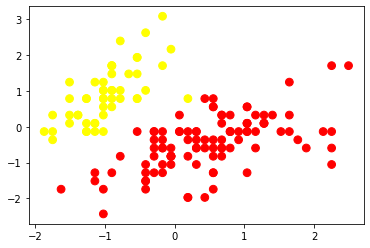

In [112]:
plt.scatter(X_scaled_iris[:, 0], X_scaled_iris[:, 1], cmap='autumn', c=clusters_iris, s=60)

In [128]:
# строим график локтя длятого чтобы понять оптимальное количество кластреров 

k_inertia = []

ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_iris)
  
    k_inertia.append(clf_kmeans.inertia_)

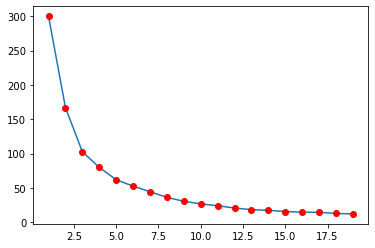

In [127]:
#Два с половиной округлим до 2х
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [125]:
# попробуем другой метод (оказался точнее)
aglo = AgglomerativeClustering(n_clusters=2)
clusters_iris2 = aglo.fit_predict(X_scaled_iris)
clusters_iris2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

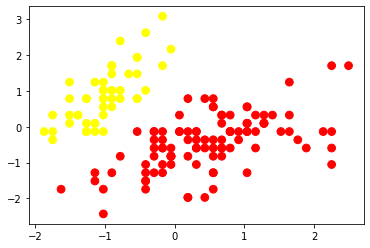

In [129]:
#Получается два кластера, даже визуально они хорошо регистрируются 
plt.scatter(X_scaled_iris[:, 0], X_scaled_iris[:, 1],cmap='autumn', c=clusters_iris2, s=60)